In [1]:
from __future__ import division, print_function

# Std lib
import glob

# Third-party
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Custom
import gary.coordinates as gc
import gary.dynamics as gd
import gary.integrate as gi
import gary.io as io
import gary.potential as gp
from gary.units import galactic

from streammorphology.freqmap import estimate_dt_nsteps
from streammorphology.ensemble.core import do_the_kld, create_ball

### Stream-fanning orbit

In [2]:
x0 = np.array([8.312877511, 0.242593717, 16.811943627])
v0 = ([-52.429087, -96.697363, -8.156130]*u.km/u.s).to(u.kpc/u.Myr).value
w0 = np.append(x0,v0)

In [3]:
potential = gp.LM10Potential()

In [4]:
dt,nsteps = estimate_dt_nsteps(potential, w0, nperiods=250, nsteps_per_period=250)

In [15]:
t,w = potential.integrate_orbit(w0, dt=dt, nsteps=nsteps, 
                                Integrator=gi.DOPRI853Integrator)

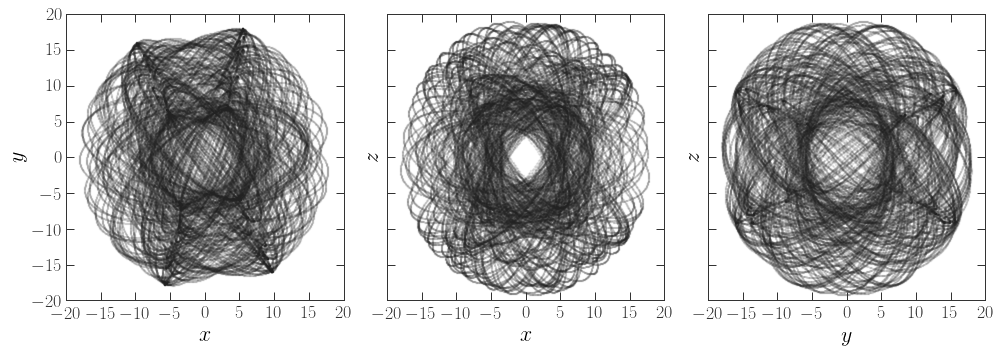

In [83]:
fig = gd.plot_orbits(w,marker='.',alpha=0.1,linestyle='none')

In [54]:
le,le_t,le_w = gd.fast_lyapunov_max(w0, potential, dt, 600000)

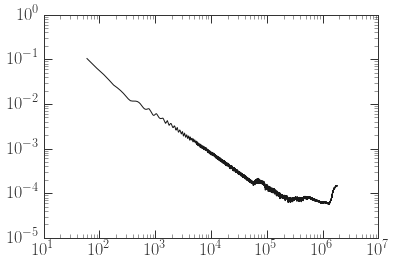

In [65]:
plt.loglog(t[1:], le[:,0], marker=None)

## Pal 5 Lyapunov time

In [70]:
1 / le[-20000:,0].mean()

10136.271006444989

## NAFF

In [16]:
naff = gd.NAFF(t[:nsteps//2+1])

In [17]:
# new_w = gc.poincare_polar(w[:nsteps//2+1,0])
new_w = w[:nsteps//2+1,0]
fs = [(new_w[:,i] + 1j*new_w[:,i+3]) for i in range(3)]
freqs1,d,nv = naff.find_fundamental_frequencies(fs)

In [18]:
# new_w = gc.poincare_polar(w[nsteps//2:,0])
new_w = w[nsteps//2:,0]
fs = [(new_w[:,i] + 1j*new_w[:,i+3]) for i in range(3)]
freqs2,d,nv = naff.find_fundamental_frequencies(fs)

In [19]:
T = np.abs(2*np.pi / freqs1)
T

array([ 399.99463978,  427.86360725,  460.04845381])

In [93]:
nperiods = nsteps * dt / T
nperiods

array([ 278.1700503 ,  260.05139765,  241.85828285])

In [94]:
np.log10(np.abs((freqs2-freqs1)/freqs1)/(nperiods/2))

array([-6.37402464, -5.74131009, -5.65234207])

## KLD

In [25]:
ball_w0 = create_ball(w0, potential, N=1000, m_scale=2.5E4)
kld_dt,kld_nsteps = estimate_dt_nsteps(potential, w0, nperiods=50, nsteps_per_period=100)

In [26]:
kld_t,kld,mean_dens = do_the_kld(256, ball_w0, potential, kld_dt,kld_nsteps, 
                                 kde_bandwidth=10., density_thresholds=None) 

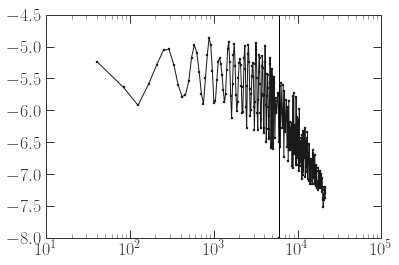

In [29]:
# plt.loglog(kld_t / T.mean(), mean_dens)
plt.semilogx(kld_t, kld)
plt.axvline(6000)

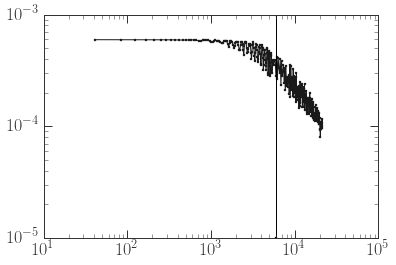

In [30]:
plt.loglog(kld_t, mean_dens)
plt.axvline(6000)